In [33]:
import os
from os import listdir
from os.path import join as joinpath
import pathlib
import numpy as np
import pandas as pd
import yaml

from PIL import Image

from IPython.display import clear_output

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.ion()

In [34]:
originals_dir = '/data/ssd/datasets/airliners/'
thumbnails_dir = '/data/ssd/datasets/airliners/!thumbnails'

In [44]:
def annotate(volume):
    originals_df_path = joinpath(originals_dir, f'{volume}.csv')
    thumbnails_df_path = joinpath(thumbnails_dir, f'ext_{volume}.csv')
    
    if not os.path.exists(thumbnails_df_path):
        with open(thumbnails_df_path, 'x') as thumbnails_file:
            thumbnails_file.write(f'category,path\n')
            thumbnails_file.flush()
            os.fsync(thumbnails_file.fileno())
                
    originals_df = pd.read_csv(filepath_or_buffer=originals_df_path, sep=',', header=0)
    thumbnails_df = pd.read_csv(filepath_or_buffer=thumbnails_df_path, sep=',', header=0)
    
    originals_dict = {}
    for row in originals_df.itertuples():
        originals_dict[row.path] = row.name
        
    thumbnails_dict = {}
    for row in thumbnails_df.itertuples():
        thumbnails_dict[row.path] = row.category
        
    thumbnails = set(listdir(joinpath(thumbnails_dir, volume)))
    assert set(originals_dict.keys()) == thumbnails
    unseen_thumbnails = thumbnails.difference(set(thumbnails_dict.keys()))
    
    categories_dict = {'': 'normal', 'm': 'many', 'b': 'bad', 'o': 'other'}
    
    count = len(thumbnails_dict)   
    with open(thumbnails_df_path, 'a') as thumbnails_file:
        for filename in sorted(list(unseen_thumbnails)):
            count += 1
            image = Image.open(joinpath(thumbnails_dir, volume, filename))

            plt.title(f'[{count}/{len(unseen_thumbnails) + len(thumbnails_dict)}] - {originals_dict[filename]}')
            plt.imshow(image)
            plt.grid(False)
            plt.axis('off')
            plt.pause(0.05)

            raw = None
            while raw not in categories_dict:
                raw = input('category [m - many, b - bad, o - other]: ')
                
            thumbnails_file.write(f'{categories_dict[raw]},{filename}\n')
            thumbnails_file.flush()
            os.fsync(thumbnails_file.fileno()) 

            clear_output()

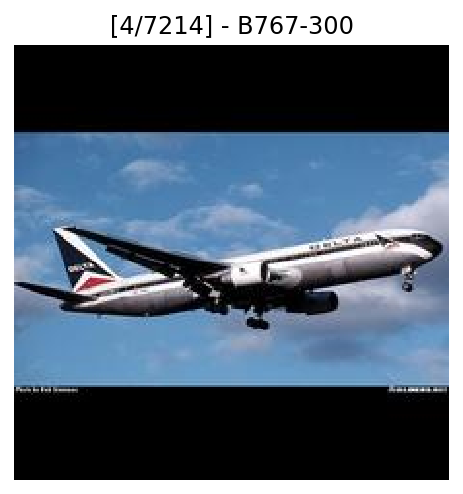

KeyboardInterrupt: 

In [45]:
annotate('train')